# Welcome to the interactive Galaxy IPython Notebook.

You can access your data via the dataset number. For example, ``handle = open(get(42), 'r')``.
To save data, write your data to a file, and then call ``put('filename.txt')``. The dataset will then be available in your galaxy history.
Notebooks can be saved to Galaxy by clicking the large green button at the top right of the IPython interface.<br>
More help and informations can be found on the project [website](https://github.com/bgruening/galaxy-ipython).

In [1]:
!conda create -y -n p14 biopython


Fetching package metadata ...^C
Traceback (most recent call last):
  File "/Users/delphinel/anaconda/envs/jupyterserv/bin/conda", line 6, in <module>
    sys.exit(conda.cli.main())
  File "/Users/delphinel/anaconda/lib/python2.7/site-packages/conda/cli/main.py", line 182, in main
    return conda_exception_handler(_main, *args)
  File "/Users/delphinel/anaconda/lib/python2.7/site-packages/conda/exceptions.py", line 640, in conda_exception_handler
    return_value = func(*args, **kwargs)
  File "/Users/delphinel/anaconda/lib/python2.7/site-packages/conda/cli/main.py", line 140, in _main
    exit_code = args.func(args, p)
  File "/Users/delphinel/anaconda/lib/python2.7/site-packages/conda/cli/main_create.py", line 68, in execute
    install(args, parser, 'create')
  File "/Users/delphinel/anaconda/lib/python2.7/site-packages/conda/cli/install.py", line 231, in install
    unknown=index_args['unknown'], prefix=prefix)
  File "/Users/delphinel/anaconda/lib/python2.7/site-packages/conda/com

In [2]:
!source activate pa14

In [8]:
!conda install -y -c anaconda biopython
!conda install -y -c anaconda networkx 
!conda install -y -c biocore mafft 
!conda install -y -c conda-forge seaborn 
!conda install -y  -c conda-forge matplotlib 
!conda install -y -c etetoolkit ete3 

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [10]:
!conda install -y pandasql

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [3]:
import pandas as pd
from pandasql import *
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import pylab
from ete3 import Tree, TreeStyle, NodeStyle, TextFace, faces, AttrFace
pysqldf = lambda q: sqldf(q, globals())

Import files output of snpsift

In [332]:
! ls -lat |head


total 73176
drwxr-xr-x  26 delphinel  staff      832 Apr 13 13:18 .
-rw-r--r--@  1 delphinel  staff  2129789 Apr 13 13:18 Galaxy754-[Column_Join_on_data_753,_data_752,_and_others].tabular
-rw-r--r--   1 delphinel  staff  1424433 Apr 13 13:14 Intragenic variants - non frameshift variants (1).ipynb
-rw-r--r--@  1 delphinel  staff  4831775 Apr 13 13:10 Galaxy4724-[Column_Join_on_data_4723,_data_4722,_and_others].tabular
-rw-r--r--@  1 delphinel  staff  2129789 Apr 13 12:57 Galaxy4640-[Column_Join_on_data_4639,_data_4638,_and_others].tabular
-rw-r--r--@  1 delphinel  staff  2504375 Apr 13 12:32 Galaxy4387-[Collapse_Collection_on_data_4385,_data_4384,_and_others].tabular
-rw-r--r--@  1 delphinel  staff  2371396 Apr 13 12:18 Galaxy4219-[Collapse_Collection_on_data_4218,_data_4217,_and_others].tabular
-rw-r--r--   1 delphinel  staff     3239 Apr 13 10:45 pa14_nonFs_unaligned.nwk
-rw-r--r--   1 delphinel  staff     3241 Apr 13 10:45 pa14_nonFs_aligned.nwk


Parameters of input files : 
        - EFFECT!='intergenic_region'
        - ',' not in ALT
        - strand_bias<0.001
        -  (SAR + SAF ) > 10
        

In [4]:

joined = pd.read_table('Galaxy4724-[Column_Join_on_data_4723,_data_4722,_and_others].tabular')
collapsed = pd.read_table('Galaxy4219-[Collapse_Collection_on_data_4218,_data_4217,_and_others].tabular')

Replacing problematic caracters in the column names

In [5]:
for i in joined.columns.values : 
    joined=joined.rename(index=str, columns={i:i.replace('.','_')})
    joined=joined.rename(index=str, columns={i:i.replace('[*]','_')})
    


In [38]:
sequences=joined.copy()

### Plotting Strand Bias

Calculation Strand Bias : 
a1

b2

c3

d4

1. Forward strand reference allele.

2. Forward strand non reference allele.

3. Reverse strand reference allele.

4. Reverse strand non reference allele.

SB: SB is defined as ∣∣(b/(a+b))−(d/(c+d))∣∣/((b+d)/(a+b+c+d)). 

a =  Forward strand reference allele = SRF = c5
b =  Forward strand non reference allele = SAF = c7  
c = Reverse strand reference allele. = SRR = c6
d =  Reverse strand non reference allele = SAR = c8

SB =  ∣∣(SAF/(SRF+SAF))−(SAR/(SRR+SAR))∣∣/((SAF+SAR)/(SRF+SAF+SRR+SAR)).
SB =  abs((SAF/(SRF+SAF))−(SAR/(SRR+SAR)))/((SAF+SAR)/(SRF+SAF+SRR+SAR)).
SB =  abs((c7/(c5+c7))−(c8/(c6+c8)))/((c7+c8)/(c5+c7+c6+c8)).

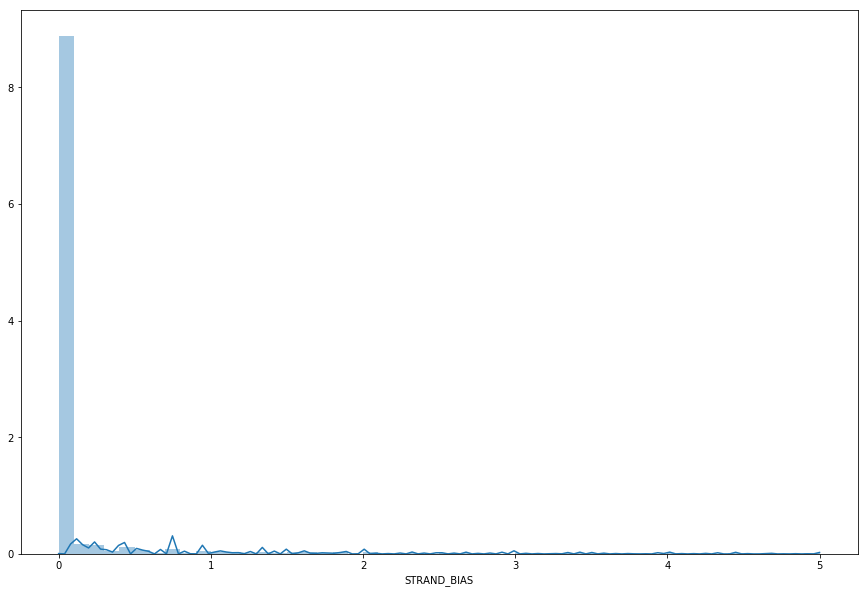

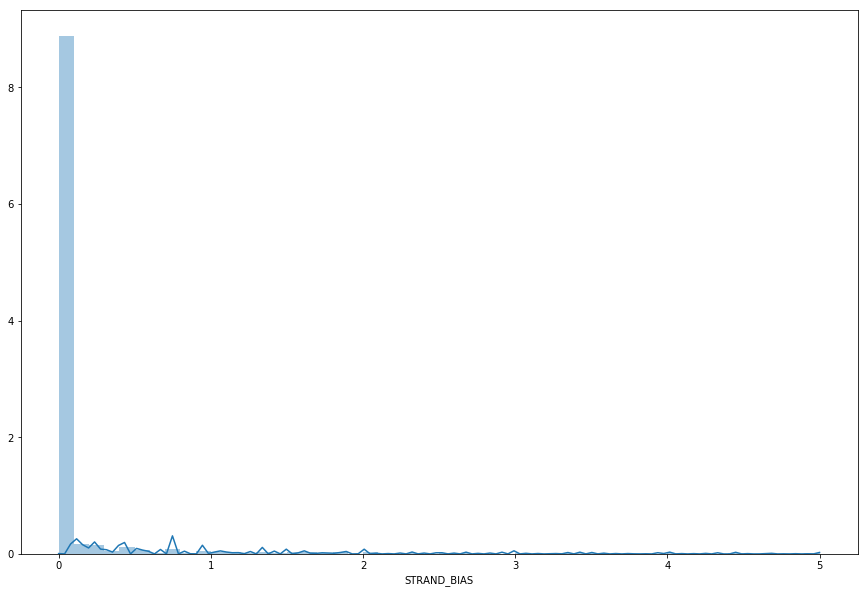

In [39]:
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(15, 10) )  # create figure & 1 axis

sns.distplot(collapsed["STRAND_BIAS"]);
display(fig)

Get lists of Columns of interest : containing the ref and alt sequences, and the metrics


In [40]:
regexREF=re.compile(".*(REF).*")
listREF=filter(regexREF.match,joined.columns.values)
regexALT=re.compile(".*(ALT).*")
listALT=filter(regexALT.match,joined.columns.values)
regexclean=re.compile(".*(ALT)|(REF)|(SRF)|(_SRR)|(SAF)|(SAR)|(STRAND_BIAS)|(var_id).*")
listrefsalts=filter(lambda i: not regexclean.search(i),joined.columns.values)


Keep only \_REF and \_ALT columns, delete the other ones

In [41]:
for i in listrefsalts[1:]:
    del sequences[i]

Creation of a Column that will contain the reference sequence. Setting it at 'NaN' for the moment


In [42]:
listsamples= [ i.replace('_fq_REF','') for i in listREF ]
sequences['REF']="NaN"

Parsing the dataframe to find a collumn containing the reference sequence. Setting the 'REF' column with its content

In [43]:
for i, row in sequences.iterrows() :
    for j in listREF :
        if row[j]!='.':
            sequences.loc[i,('REF')]=row[j]
            break

Deleting the collumns containing the reference sequence, now redundant with 'REF' clumn

In [44]:
for i in listREF:
    del sequences[i]


In the Dataframe, replaceing every instance of '.', meaning there is no variant, with the reference sequence

In [15]:
sequences

,var_id,SRR5363633_wtP_fq_CHROM,SRR5363633_wtP_fq_ALT,SRR5363633_wtP_fq_SRF,SRR5363633_wtP_fq_SRR,SRR5363633_wtP_fq_SAF,SRR5363633_wtP_fq_SAR,SRR5363633_wtP_fq_STRAND_BIAS,SRR5363634_con_fq_ALT,SRR5363634_con_fq_SRF,...,SRR5363714_cip_fq_SAF,SRR5363714_cip_fq_SAR,SRR5363714_cip_fq_STRAND_BIAS,SRR5363715_cip_fq_ALT,SRR5363715_cip_fq_SRF,SRR5363715_cip_fq_SRR,SRR5363715_cip_fq_SAF,SRR5363715_cip_fq_SAR,SRR5363715_cip_fq_STRAND_BIAS,REF
0,100578.0C,.,C,.,.,.,.,.,C,.,...,.,.,.,C,.,.,.,.,.,C
1,1016267.0A,.,A,.,.,.,.,.,A,.,...,.,.,.,A,.,.,.,.,.,A
2,1018706.0AGGCG,.,AGGCG,.,.,.,.,.,AGGCG,.,...,.,.,.,AGGCG,.,.,.,.,.,AGGCG
3,1018719.0A,.,A,.,.,.,.,.,A,.,...,.,.,.,A,.,.,.,.,.,A
4,1018724.0C,.,C,.,.,.,.,.,C,.,...,.,.,.,C,.,.,.,.,.,C
5,1026509.0ACCCCCCCA,.,ACCCCCCCA,.,.,.,.,.,ACCCCCCCA,.,...,.,.,.,ACCCCCCCA,.,.,.,.,.,ACCCCCCCA
6,1026747.0GACCACCACCACCA,.,GACCACCACCACCA,.,.,.,.,.,GACCACCACCACCA,.,...,.,.,.,GACCACCACCACCA,.,.,.,.,.,GACCACCACCACCA
7,1027040.0C,.,C,.,.,.,.,.,C,.,...,.,.,.,C,.,.,.,.,.,C
8,1027725.0CTTGCACGG,.,CTTGCACGG,.,.,.,.,.,CTTGCACGG,.,...,.,.,.,CTTGCACGG,.,.,.,.,.,CTTGCACGG
9,1046166.0CGGCTGGCTG,.,CGGCTGGCTG,.,.,.,.,.,CGGCTGGCTG,.,...,.,.,.,CGGCTGGCTG,.,.,.,.,.,CGGCTGGCTG


In [16]:
for i, row in sequences.iterrows() :
    for j in listsamples :
        if row[j+'_fq_ALT']=='.':
            sequences.loc[i,(j+'_fq_ALT')]=row['REF']

In [ ]:
sequences

In [46]:
for i, row in sequences.iterrows() :
    for j in listsamples :
        if row[j+'_fq_ALT']=='.':
            sequences.loc[i,(j+'_fq_ALT')]=row['REF']
        elif (int(row[j+'_fq_SRF'])+int(row[j+'_fq_SRR'])) > (int(row[j+'_fq_SAF'])+int(row[j+'_fq_SAR'])) or (int(row[j+'_fq_SAF'])+int(row[j+'_fq_SAR']))<10 : 
            sequences.loc[i,(j+'_fq_ALT')]=row['REF']


Saving the resulting mdataframe in a file

In [47]:
sequences.to_csv('matrix_sequence_nonFs_allvar.tab',sep='\t')

Removing variants where ref and alt have different lengths

Creating a Fasta file containing the concatenated sequences

In [48]:
ouptutfasta=open("samplevariants_mostrep.fasta","w")
for j in listsamples :
    ouptutfasta.write(">"+j+"\n"+"".join(sequences[j+"_fq_ALT"])+"\n")
ouptutfasta.close()

In [49]:
for i, row in sequences.iterrows() :
    for j in listsamples :
        if len(row[j+"_fq_ALT"])!=  len(row['REF']):
            sequences=sequences.drop(i)
            break

In [50]:
ouptutfasta=open("samplevariants_nonFS_mostrep.fasta","w")
for j in listsamples :
    ouptutfasta.write(">"+j+"\n"+"".join(sequences[j+"_fq_ALT"])+"\n")
ouptutfasta.close()

In [51]:
for i in listALT:
    sequences=sequences.rename(index=str, columns={i:i.replace("_fq_ALT","")})

Aligning the sequences with MAFFT (Allows to resolve gaps in cas the REF and ALT sequences are of different lengths)

In [52]:
!mafft --auto samplevariants_mostrep.fasta > samplevariants_align_nonFs_mostrep.fasta


##### atgcfreq = 1.000000
nseq =  82
distance =  local
iterate =  16
cycle =  1
nthread = 0
lastonce = 0
generating a scoring matrix for nucleotide (dist=200) ... done
done
done
scoremtx = -1
   80 / 82

##### writing hat3
pairlocalalign (nuc) Version 7.245 alg=L, model=DNA200 (2), 2.00 (6.00), -0.10 (-0.30), noshift, amax=0.0
0 thread(s)
minimumweight = 0.000500
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
Loading 'hat3' ... 
done.
generating a scoring matrix for nucleotide (dist=200) ... done
done
done
scoremtx = -1
Gap Penalty = -1.53, +0.00, +0.00
Loading 'hat2' ... done.
Constructing a UPGMA tree ... 
   80 / 82
done.

Progressive alignment ... 
STEP    71 /81 c
Reallocating..done. *alloclen = 5284
STEP    81 /81 c
done.
tbfast (nuc) Version 7.245 alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)
minimumweight = 0.000500
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global 

Opening the output of MAFFT , convert to upper case and compute the distance matrix

In [53]:
alignementfile=open('samplevariants_align_nonFs_mostrep.fasta','r')
upperalignmentfile=open('samplevariants_align_upper_nonFs.fasta','w')
alignment=alignementfile.read().upper()
upperalignmentfile.write(alignment)
alignementfile.close()
upperalignmentfile.close()
aln = AlignIO.read('samplevariants_align_upper_nonFs.fasta', 'fasta')
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)
Phylo.write(tree,'pa14_nonFs_aligned_mostrep.nwk', 'newick')

1

Compute the distance matrix for the non aligned fasta file

In [54]:
aln = AlignIO.read('samplevariants_nonFs_mostrep.fasta', 'fasta')
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)
Phylo.write(tree,'pa14_nonFs_unaligned_mostrep.nwk', 'newick')

1

Build a tree from the Distance MAtrix (Here using neighor joining algorithm) and saving it in a newick file

### Draw Tree from a Newick File

Open Treefile

Set drawing style, title, and color per condition

In [55]:
t = Tree("pa14_nonFs_aligned_mostrep.nwk", format=1)


ts = TreeStyle()
#ts.title.add_face(TextFace("Pa14", fsize=35), column=0)
#ts.mode="c"
ts.scale =  3000 
ts.branch_vertical_margin = 5
ts.show_branch_length = False
ts.show_branch_support = False

def color_leaves(node):
    regcon=re.compile(".*_CON.*")
    regwt=re.compile(".*_WT.*")
    regcip=re.compile(".*_CIP.*")
    regcef=re.compile(".*_CEF.*")
    recar=re.compile(".*_CAR.*")
    regdor=re.compile(".*_DOR.*")
    reggen=re.compile(".*_GEN.*")
    regimi=re.compile(".*_IMI.*")
    regpit=re.compile(".*_PIT.*")
    regstr=re.compile(".*_STR.*")
    node.img_style['size']=0
    if node.is_leaf() :
        node.img_style["size"] = 10
        if  re.search(regcon,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "red"
        if  re.search(regwt,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "blue"
        if  re.search(regcip,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "orange"
        if  re.search(regcef,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "green"
        if  re.search(recar,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "purple"
        if  re.search(regdor,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "yellow"
        if  re.search(reggen,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "brown"
        if  re.search(regimi,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "black"
        if  re.search(regpit,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "lightgreen"
        if  re.search(regstr,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "pink"
    
ts.layout_fn = [color_leaves]
#ancestor = t.get_common_ancestor("SRR5363633_WTP")

t.set_outgroup("SRR5363633_WTP")

Render tree in the jupyter notebook

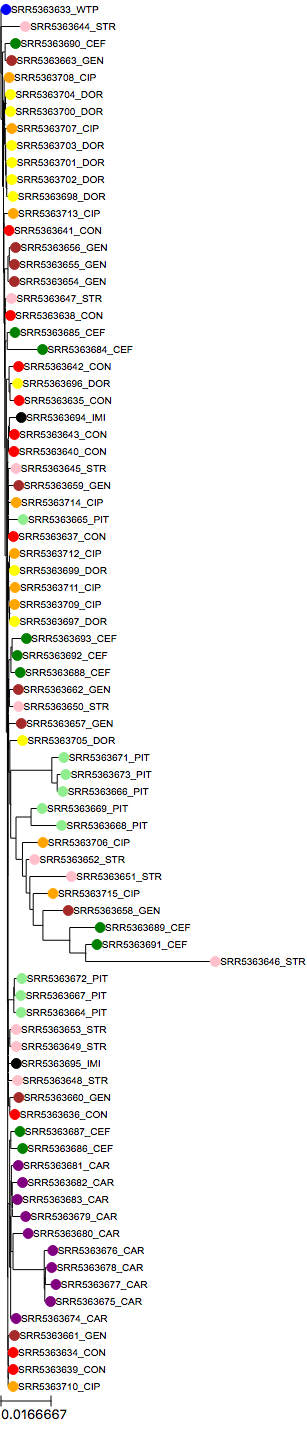

In [56]:
t.render("%%inline", tree_style=ts)


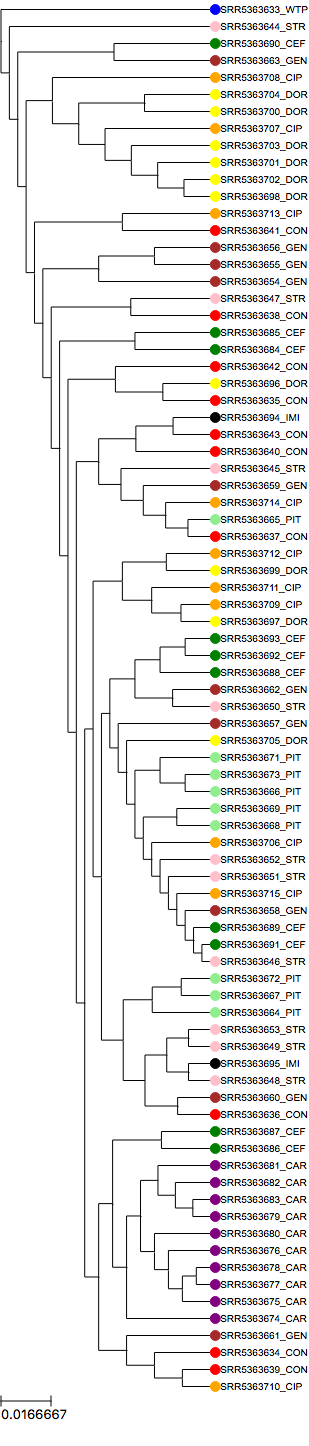

In [57]:
t.convert_to_ultrametric(strategy='balanced')
t.render("%%inline", tree_style=ts)


In [58]:
t = Tree("pa14_nonFs_unaligned_mostrep.nwk", format=1)


ts = TreeStyle()
#ts.title.add_face(TextFace("Pa14", fsize=35), column=0)
#ts.mode="c"
ts.scale =  3000 
ts.branch_vertical_margin = 5
ts.show_branch_length = False
ts.show_branch_support = False

def color_leaves(node):
    regcon=re.compile(".*_con.*")
    regwt=re.compile(".*_wt.*")
    regcip=re.compile(".*_cip.*")
    regcef=re.compile(".*_cef.*")
    recar=re.compile(".*_car.*")
    regdor=re.compile(".*_dor.*")
    reggen=re.compile(".*_gen.*")
    regimi=re.compile(".*_imi.*")
    regpit=re.compile(".*_pit.*")
    regstr=re.compile(".*_str.*")
    node.img_style['size']=0
    if node.is_leaf() :
        node.img_style["size"] = 10
        if  re.search(regcon,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "red"
        if  re.search(regwt,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "blue"
        if  re.search(regcip,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "orange"
        if  re.search(regcef,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "green"
        if  re.search(recar,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "purple"
        if  re.search(regdor,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "yellow"
        if  re.search(reggen,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "brown"
        if  re.search(regimi,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "black"
        if  re.search(regpit,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "lightgreen"
        if  re.search(regstr,node.get_leaf_names()[0]) : 
            node.img_style["fgcolor"] = "pink"
    
ts.layout_fn = [color_leaves]    
t.set_outgroup("SRR5363633_wtP")

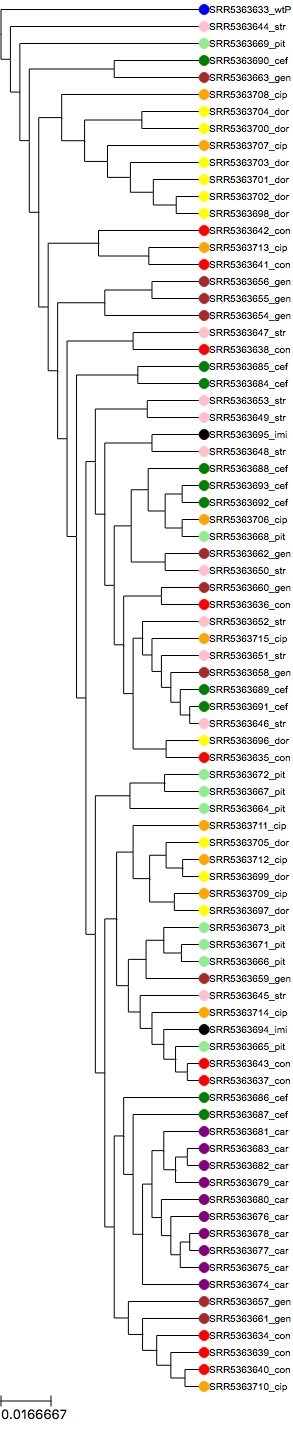

In [59]:
t.convert_to_ultrametric(strategy='balanced')
t.render("%%inline", tree_style=ts)

In [30]:
!ls -lat

total 76656
-rw-r--r--   1 delphinel  staff     3238 Apr 13 13:55 pa14_nonFs_unaligned.nwk
-rw-r--r--   1 delphinel  staff     3238 Apr 13 13:55 pa14_nonFs_aligned.nwk
-rw-r--r--   1 delphinel  staff   184336 Apr 13 13:55 samplevariants_align_upper_nonFs.fasta
-rw-r--r--   1 delphinel  staff   184336 Apr 13 13:55 samplevariants_align_nonFs.fasta
drwxr-xr-x  26 delphinel  staff      832 Apr 13 13:54 .
-rw-r--r--   1 delphinel  staff  1426019 Apr 13 13:54 Intragenic variants - non frameshift variants (1).ipynb
-rw-r--r--   1 delphinel  staff   128166 Apr 13 13:52 samplevariants_nonFs.fasta
-rw-r--r--   1 delphinel  staff   175362 Apr 13 13:52 samplevariants.fasta
-rw-r--r--   1 delphinel  staff  1303925 Apr 13 13:52 matrix_sequence_nonFs.tab
-rw-r--r--@  1 delphinel  staff  2129789 Apr 13 13:18 Galaxy754-[Column_Join_on_data_753,_data_752,_and_others].tabular
-rw-r--r--@  1 delphinel  staff  4831775 Apr 13 13:10 Galaxy4724-[Column_Join_on_data_4723,_data_4722,_and_others].tabular
-rw-r--

In [144]:

joined_all = pd.read_table('Galaxy3885-[Column_Join_on_data_3884,_data_3883,_and_others].tabular')
collapsed_all = pd.read_table('Galaxy3886-[Collapse_Collection_on_data_3884,_data_3883,_and_others].tabular')

In [205]:
var=collapsed_all.rename(index=str, columns={"EFF[*].CODON":"CODON","EFF[*].GENE":"GENE","EFF[*].EFFECT":"EFFECT","EFF[*].EFFECT":"EFFECT","EFF[*].AA":"AA","EFF[*].IMPACT":"IMPACT","EFF[*].IMPACT.1":"IMPACT1", "EFF[*].FUNCLASS" :"FUNCLASS"})




In [146]:
varjoined=joined_all.copy()

In [147]:
varjoined

,var_id,SRR5363633_wtP.fq_CHROM,SRR5363633_wtP.fq_POS,SRR5363633_wtP.fq_REF,SRR5363633_wtP.fq_ALT,SRR5363633_wtP.fq_SRF,SRR5363633_wtP.fq_SRR,SRR5363633_wtP.fq_SAF,SRR5363633_wtP.fq_SAR,SRR5363633_wtP.fq_EFF[*].EFFECT,...,SRR5363715_cip.fq_SAF,SRR5363715_cip.fq_SAR,SRR5363715_cip.fq_EFF[*].EFFECT,SRR5363715_cip.fq_EFF[*].IMPACT,SRR5363715_cip.fq_EFF[*].IMPACT.1,SRR5363715_cip.fq_EFF[*].GENE,SRR5363715_cip.fq_EFF[*].AA,SRR5363715_cip.fq_EFF[*].CODON,SRR5363715_cip.fq_EFF[*].FUNCLASS,SRR5363715_cip.fq_STRAND_BIAS
0,1026509.0ACCCCCCCA,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1026747.0GACCACCACCACCA,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1027040.0C,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1027725.0CTTGCACGG,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1046166.0CGGCTGGCTG,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1046208.0AACT,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1046252.0C,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1046463.0GCATCATCATC,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1046474.0CAG,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1046787.0C,.,.,.,.,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
for i in varjoined.columns.values :
    varjoined=varjoined.rename(index=str, columns={i : i.replace(".","_")})
    varjoined=varjoined.rename(index=str, columns={i : i.replace("[*]","_")})

In [149]:
regexREF=re.compile(".*(REF).*")
listREF=filter(regexREF.match,varjoined.columns.values)
regexALT=re.compile(".*(ALT).*")
listALT=filter(regexALT.match,varjoined.columns.values)
regexclean=re.compile(".*(ALT)|(REF)|('var_id')|(STRAND_BIAS).*")
listrefsalts=filter(lambda i: not regexclean.search(i),varjoined.columns.values)


In [150]:
for i in listrefsalts[1:]:
    del varjoined[i]

In [151]:
varjoined

,var_id,SRR5363633_wtP_fq_REF,SRR5363633_wtP_fq_ALT,SRR5363633_wtP_fq_STRAND_BIAS,SRR5363634_con_fq_REF,SRR5363634_con_fq_ALT,SRR5363634_con_fq_STRAND_BIAS,SRR5363635_con_fq_REF,SRR5363635_con_fq_ALT,SRR5363635_con_fq_STRAND_BIAS,...,SRR5363712_cip_fq_STRAND_BIAS,SRR5363713_cip_fq_REF,SRR5363713_cip_fq_ALT,SRR5363713_cip_fq_STRAND_BIAS,SRR5363714_cip_fq_REF,SRR5363714_cip_fq_ALT,SRR5363714_cip_fq_STRAND_BIAS,SRR5363715_cip_fq_REF,SRR5363715_cip_fq_ALT,SRR5363715_cip_fq_STRAND_BIAS
0,1026509.0ACCCCCCCA,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN
1,1026747.0GACCACCACCACCA,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN
2,1027040.0C,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN
3,1027725.0CTTGCACGG,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN
4,1046166.0CGGCTGGCTG,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN
5,1046208.0AACT,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN
6,1046252.0C,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN
7,1046463.0GCATCATCATC,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN
8,1046474.0CAG,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN
9,1046787.0C,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,NaN,NaN,NaN


In [164]:
controlvar=pysqldf("SELECT * FROM varjoined WHERE SRR5363633_wtP_fq_ALT != '.' OR SRR5363634_con_fq_ALT != '.' OR SRR5363635_con_fq_ALT != '.' OR SRR5363636_con_fq_ALT != '.' OR SRR5363637_con_fq_ALT != '.' OR SRR5363638_con_fq_ALT != '.' OR SRR5363639_con_fq_ALT != '.' OR SRR5363640_con_fq_ALT != '.' OR SRR5363641_con_fq_ALT != '.' OR SRR5363642_con_fq_ALT != '.' OR SRR5363643_con_fq_ALT != '.'")

In [167]:
relevvar=pysqldf("SELECT * FROM varjoined WHERE SRR5363633_wtP_fq_ALT == '.' AND SRR5363634_con_fq_ALT == '.' AND SRR5363635_con_fq_ALT == '.' AND SRR5363636_con_fq_ALT == '.' AND SRR5363637_con_fq_ALT == '.' AND SRR5363638_con_fq_ALT == '.' AND SRR5363639_con_fq_ALT == '.' AND SRR5363640_con_fq_ALT == '.' AND SRR5363641_con_fq_ALT == '.' AND SRR5363642_con_fq_ALT == '.' AND SRR5363643_con_fq_ALT == '.'")




In [191]:
relevPOS= [ i.split('.')[0] for i in relevvar["var_id"] ]


In [192]:
relevvar

,var_id,SRR5363633_wtP_fq_REF,SRR5363633_wtP_fq_ALT,SRR5363633_wtP_fq_STRAND_BIAS,SRR5363634_con_fq_REF,SRR5363634_con_fq_ALT,SRR5363634_con_fq_STRAND_BIAS,SRR5363635_con_fq_REF,SRR5363635_con_fq_ALT,SRR5363635_con_fq_STRAND_BIAS,...,SRR5363712_cip_fq_STRAND_BIAS,SRR5363713_cip_fq_REF,SRR5363713_cip_fq_ALT,SRR5363713_cip_fq_STRAND_BIAS,SRR5363714_cip_fq_REF,SRR5363714_cip_fq_ALT,SRR5363714_cip_fq_STRAND_BIAS,SRR5363715_cip_fq_REF,SRR5363715_cip_fq_ALT,SRR5363715_cip_fq_STRAND_BIAS
0,1026509.0ACCCCCCCA,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None
1,1026747.0GACCACCACCACCA,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None
2,1027040.0C,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None
3,1027725.0CTTGCACGG,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None
4,1046166.0CGGCTGGCTG,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None
5,1046208.0AACT,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None
6,1046252.0C,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None
7,1046463.0GCATCATCATC,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None
8,1046474.0CAG,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None
9,1046787.0C,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,None,None,None


In [193]:
relevPOS

[u'1026509',
 u'1026747',
 u'1027040',
 u'1027725',
 u'1046166',
 u'1046208',
 u'1046252',
 u'1046463',
 u'1046474',
 u'1046787',
 u'1046913',
 u'1391037',
 u'1391367',
 u'1391440',
 u'1640196',
 u'1859925',
 u'1976772',
 u'1977299',
 u'1977519',
 u'2015000',
 u'2015001',
 u'2030406',
 u'2033781',
 u'2341605',
 u'2617461',
 u'2619182',
 u'2820741',
 u'2820818',
 u'2853998',
 u'2910479',
 u'2997851',
 u'3266821',
 u'3421049',
 u'3421220',
 u'3421239',
 u'3446379',
 u'3682861',
 u'3683406',
 u'3723570',
 u'4046407',
 u'4075254',
 u'4075582',
 u'4075646',
 u'4079433',
 u'4606849',
 u'4607049',
 u'4607406',
 u'4660511',
 u'4754301',
 u'486269',
 u'486297',
 u'4947626',
 u'4982125',
 u'5112681',
 u'5116287',
 u'5116392',
 u'5116490',
 u'5117177',
 u'5118025',
 u'5236429',
 u'5354143',
 u'5372538',
 u'5375651',
 u'5508486',
 u'5547105',
 u'5636949',
 u'5637090',
 u'5637189',
 u'5637326',
 u'5637444',
 u'5637531',
 u'5671',
 u'5773057',
 u'5822582',
 u'5830039',
 u'6054819',
 u'6200647',
 u'6

In [204]:
'41753' in relevPOS

False

In [200]:
noncontrol=pysqldf("SELECT * FROM var WHERE POS  NOT IN ("+", ".join(relevPOS)+")")

In [201]:
noncontrol['condition']="NaN"

In [202]:
for i, row in noncontrol.iterrows() :
    noncontrol.loc[i,('condition')]=row['Sample'].split('_')[1].replace(".fq","")

In [229]:
var=collapsed_all.rename(index=str, columns={"EFF[*].CODON":"CODON","EFF[*].GENE":"GENE","EFF[*].EFFECT":"EFFECT","EFF[*].EFFECT":"EFFECT","EFF[*].AA":"AA","EFF[*].IMPACT":"IMPACT","EFF[*].IMPACT.1":"IMPACT1", "EFF[*].FUNCLASS" :"FUNCLASS"})


In [231]:
var['condition']="NaN"
for i, row in var.iterrows() :
    var.loc[i,('condition')]=row['Sample'].split('_')[1].replace(".fq","")

In [241]:
controlpos=pysqldf("SELECT POS FROM var WHERE condition='wtP' OR condition='con' ")['POS'].values

In [238]:
len(pysqldf("SELECT POS FROM var WHERE condition!='wtP' AND condition!='con' ").values)

8298

In [239]:
len(pysqldf("SELECT POS FROM var WHERE condition='wtP' OR condition='con' ").values)

1360

In [240]:
len(var['POS'])

9658

In [242]:
for i, row in var.iterrows() :
    if int(row["POS"]) in controlpos:
        var=var.drop(i)



In [243]:
var

,Sample,CHROM,POS,REF,ALT,SRF,SRR,SAF,SAR,EFFECT,IMPACT,IMPACT1,GENE,AA,CODON,FUNCLASS,STRAND_BIAS,var_id,condition
1386,SRR5363644_str.fq,NC_008463,1859925,A,C,15,33,0,15,"missense_variant,intragenic_variant","MODERATE,MODIFIER","MODERATE,MODIFIER","GeneID:4381313,PA14_21450","p.Asp451Ala/c.1352A>C,n.1859925A>C","gAc/gCc,NA","MISSENSE,NONE",3.306878e-04,1859925.0A,str
1436,SRR5363644_str.fq,NC_008463,3421220,GAACCGGGTT,GT,0,0,114,134,"frameshift_variant,intragenic_variant","HIGH,MODIFIER","HIGH,MODIFIER","GeneID:4380304,PA14_38380","p.Glu98fs/c.294_301delACCCGGTT,n.3421221_34212...","gaacccggttcg/,NA","NONE,NONE",0.000000e+00,3421220.0GAACCGGGTT,str
1465,SRR5363644_str.fq,NC_008463,4947626,A,G,0,0,9,9,"missense_variant,intragenic_variant","MODERATE,MODIFIER","MODERATE,MODIFIER","GeneID:4384918,PA14_55600","p.Lys147Arg/c.440A>G,n.4947626A>G","aAg/aGg,NA","MISSENSE,NONE",0.000000e+00,4947626.0A,str
1476,SRR5363644_str.fq,NC_008463,5354143,T,C,0,0,257,286,"missense_variant,intragenic_variant","MODERATE,MODIFIER","MODERATE,MODIFIER","GeneID:4384535,PA14_60110","p.Tyr205Cys/c.614A>G,n.5354143T>C","tAc/tGc,NA","MISSENSE,NONE",0.000000e+00,5354143.0T,str
1483,SRR5363644_str.fq,NC_008463,5830039,TCGGCC,TC,0,0,120,152,"frameshift_variant,intragenic_variant","HIGH,MODIFIER","HIGH,MODIFIER","GeneID:4384856,PA14_65430","p.Ala117fs/c.348_351delGGCC,n.5830041_5830044d...","caggcc/,NA","NONE,NONE",0.000000e+00,5830039.0TCGGCC,str
1493,SRR5363644_str.fq,NC_008463,6530292,C,A,0,0,123,153,"synonymous_variant,intragenic_variant","LOW,MODIFIER","LOW,MODIFIER","GeneID:4384093,PA14_73360","p.Pro90Pro/c.270G>T,n.6530292C>A","ccG/ccT,NA","SILENT,NONE",0.000000e+00,6530292.0C,str
1505,SRR5363645_str.fq,NC_008463,754955,A,G,0,0,31,54,"missense_variant,intragenic_variant","MODERATE,MODIFIER","MODERATE,MODIFIER","GeneID:4381343,PA14_08790","p.Lys88Arg/c.263A>G,n.754955A>G","aAg/aGg,NA","MISSENSE,NONE",0.000000e+00,754955.0A,str
1595,SRR5363645_str.fq,NC_008463,4982125,C,G,2,0,10,16,"missense_variant,intragenic_variant","MODERATE,MODIFIER","MODERATE,MODIFIER","GeneID:4382572,PA14_55780","p.Gly224Arg/c.670G>C,n.4982125C>G","Ggc/Cgc,NA","MISSENSE,NONE",2.289377e-04,4982125.0C,str
1630,SRR5363647_str.fq,NC_008463,754955,A,G,0,0,25,30,"missense_variant,intragenic_variant","MODERATE,MODIFIER","MODERATE,MODIFIER","GeneID:4381343,PA14_08790","p.Lys88Arg/c.263A>G,n.754955A>G","aAg/aGg,NA","MISSENSE,NONE",0.000000e+00,754955.0A,str
1868,SRR5363649_str.fq,NC_008463,754955,A,G,0,0,23,56,"missense_variant,intragenic_variant","MODERATE,MODIFIER","MODERATE,MODIFIER","GeneID:4381343,PA14_08790","p.Lys88Arg/c.263A>G,n.754955A>G","aAg/aGg,NA","MISSENSE,NONE",0.000000e+00,754955.0A,str


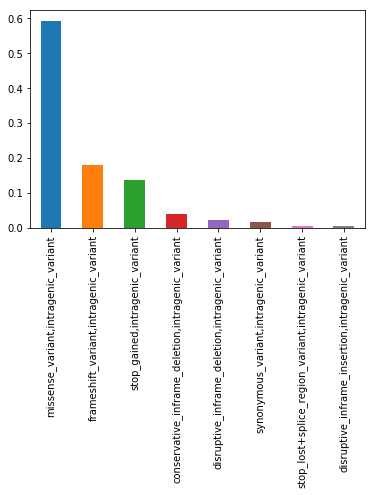

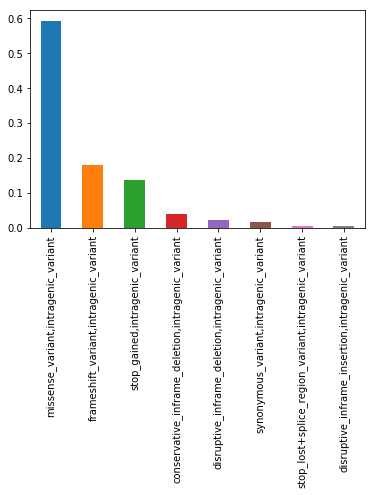

In [246]:
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
var['EFFECT'].value_counts(normalize=True).plot.bar()
display(fig)

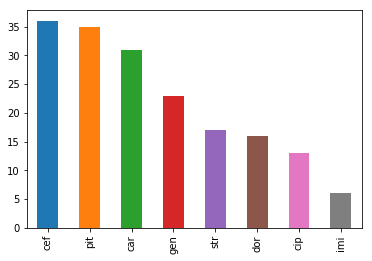

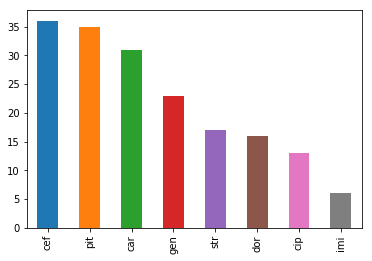

In [249]:
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
var['condition'].value_counts().plot.bar()
display(fig)


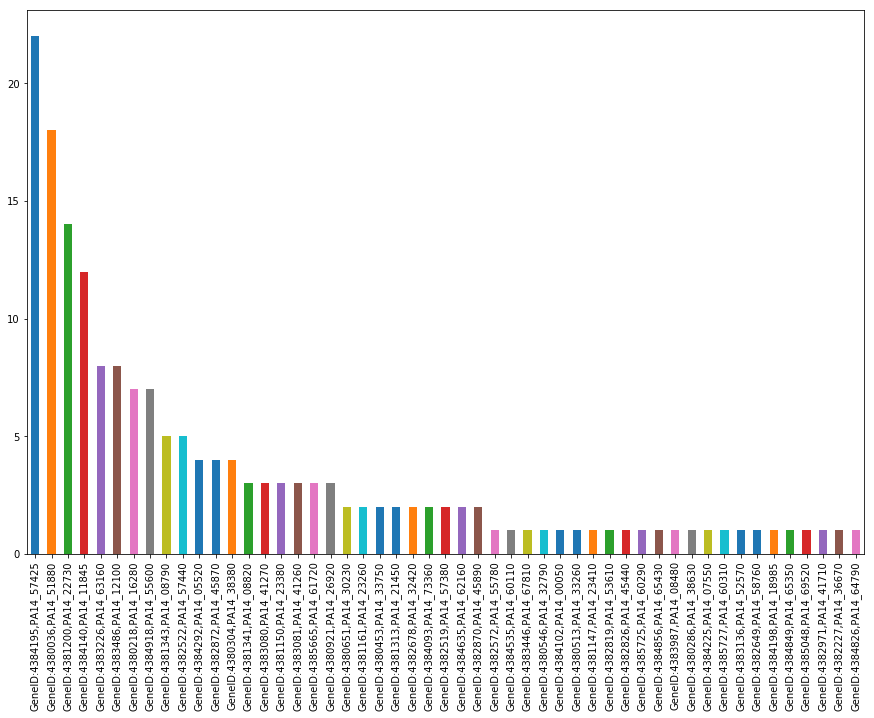

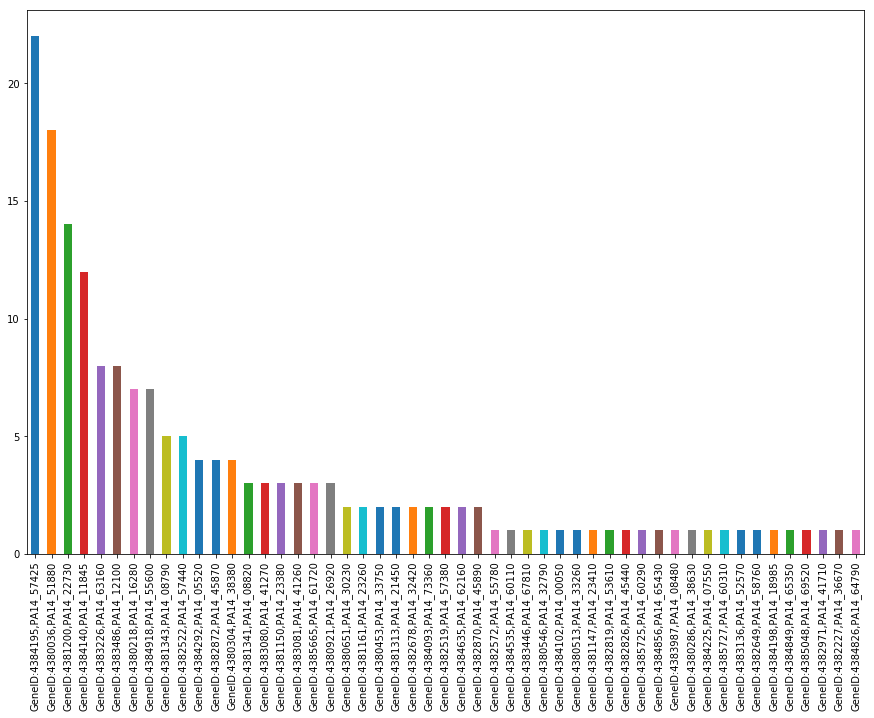

In [251]:
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(15, 10) )  # create figure & 1 axis
var['GENE'].value_counts().plot.bar()
display(fig)

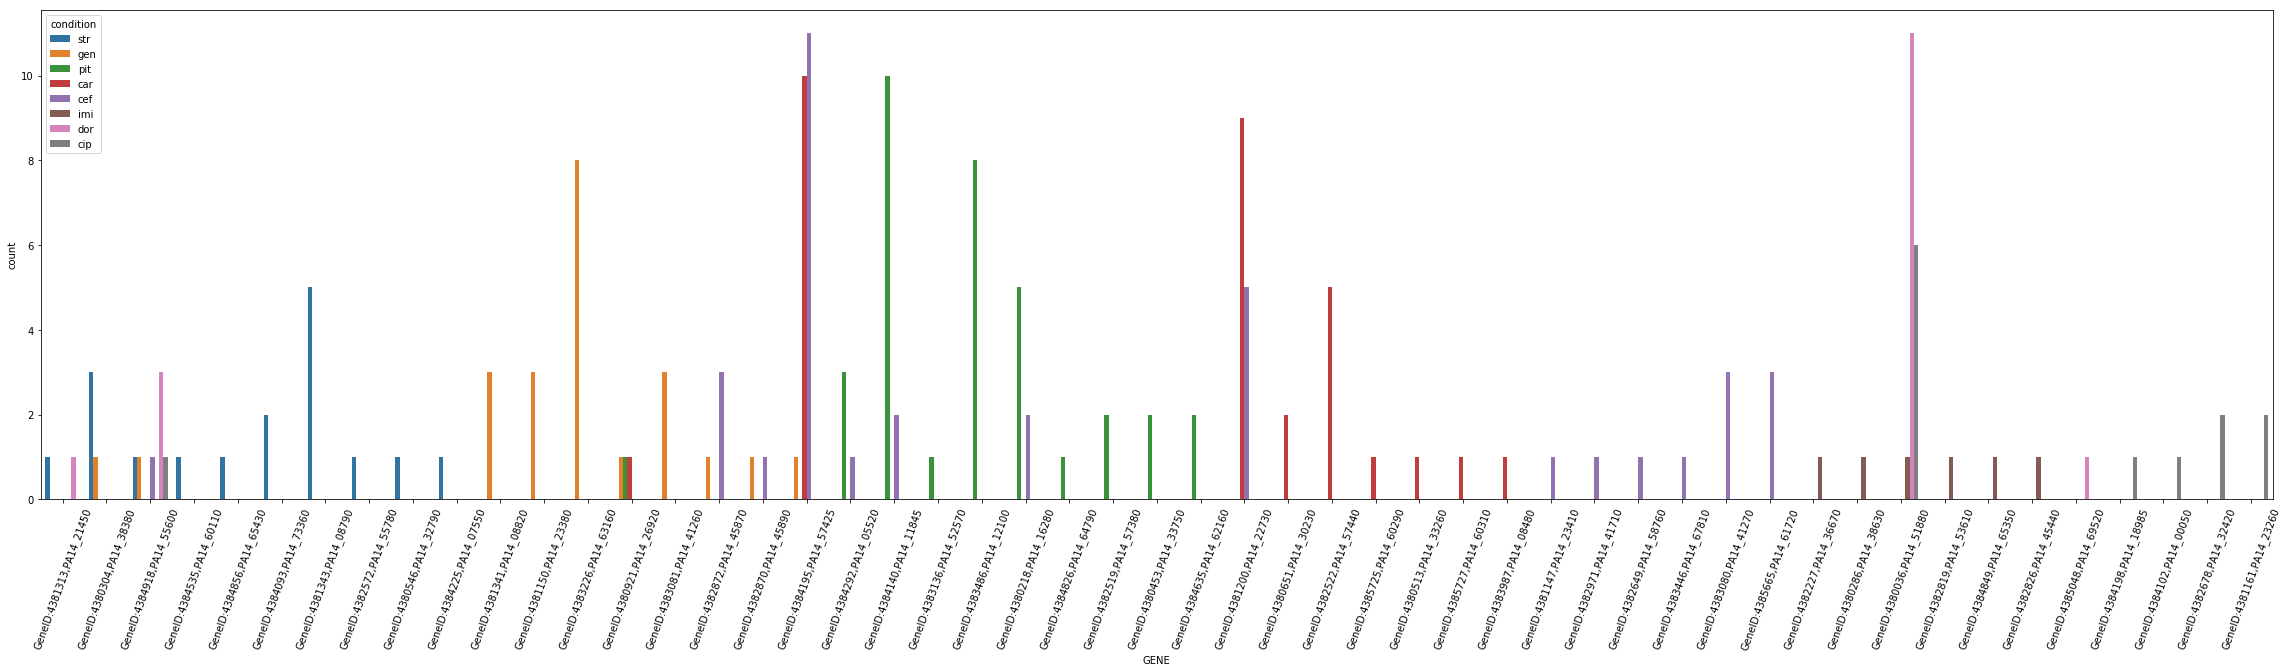

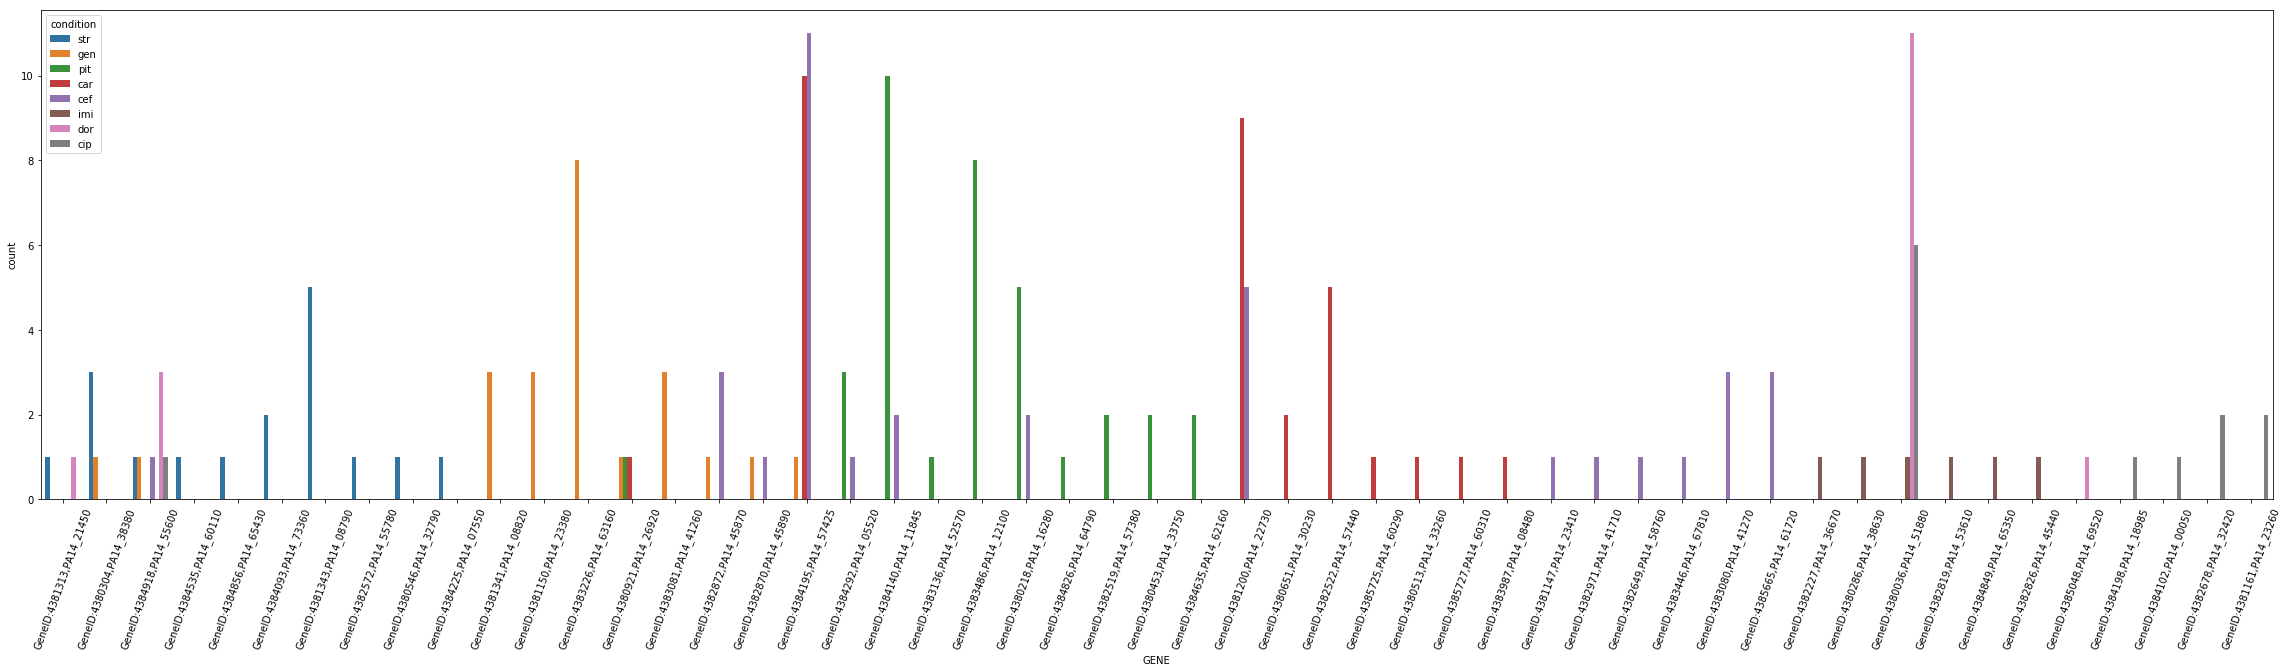

In [253]:
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(40, 9) )  # create figure & 1 axis
sns.countplot(x="GENE", hue="condition",data=pysqldf('SELECT condition, EFFECT, GENE FROM var'));
plt.xticks(rotation=70)
display(fig)

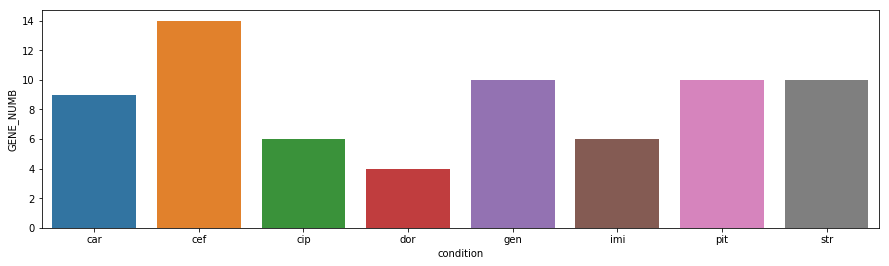

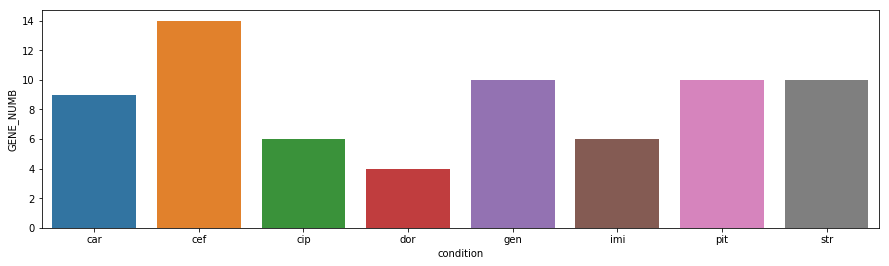

In [255]:
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(15, 4) )  # create figure & 1 axis
sns.barplot(x="condition", y="GENE_NUMB", data=pysqldf('SELECT condition, COUNT(DISTINCT UPPER(GENE)) AS GENE_NUMB  FROM var GROUP BY condition'));
display(fig)

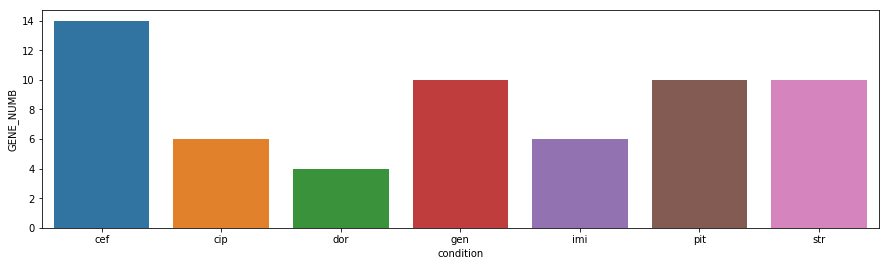

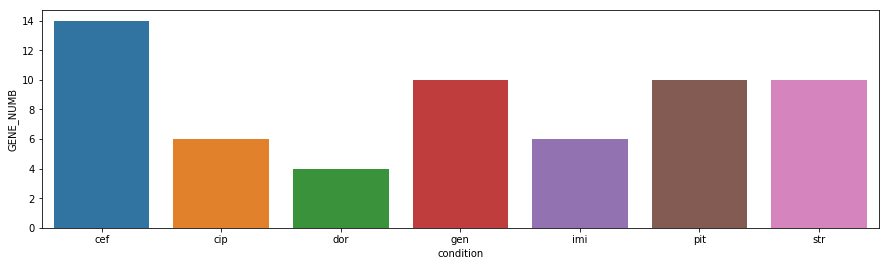

In [256]:
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(15, 4) )  # create figure & 1 axis
sns.barplot(x="condition", y="GENE_NUMB", data=pysqldf('SELECT condition, COUNT(DISTINCT UPPER(GENE)) AS GENE_NUMB  FROM var WHERE CONDITION!= "car" GROUP BY condition'));
display(fig)

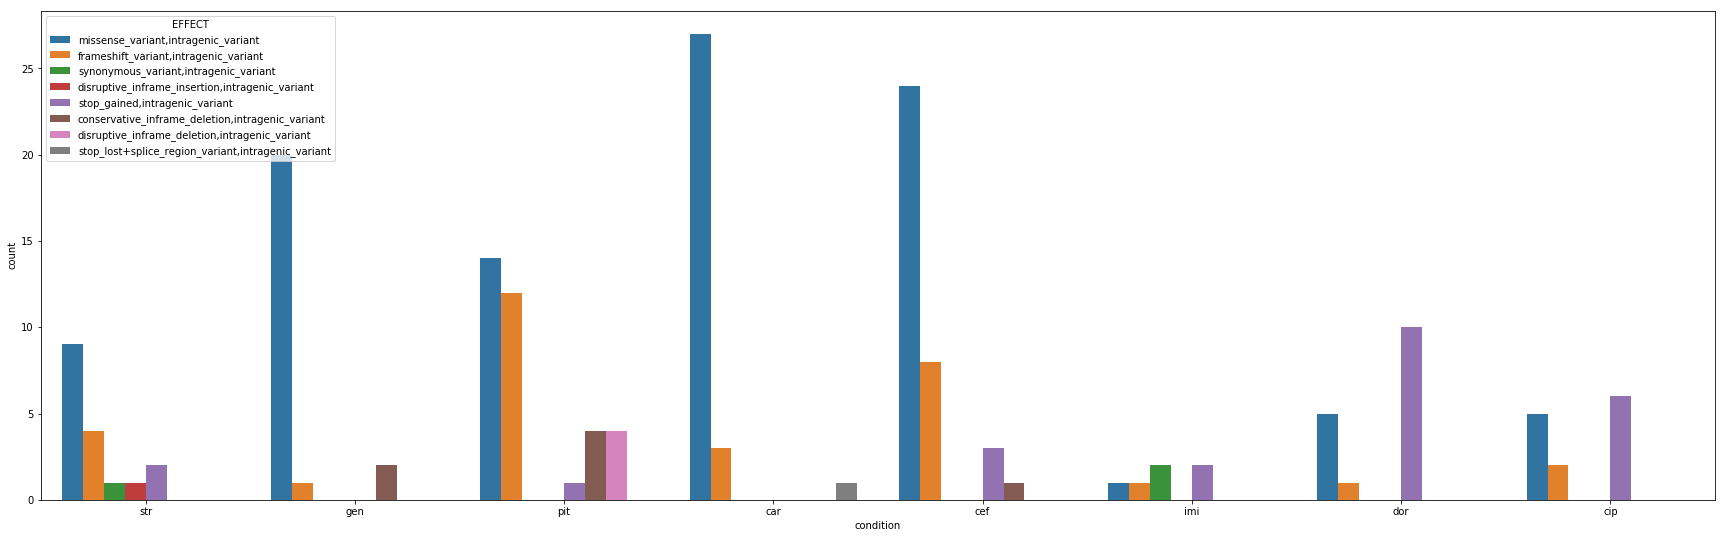

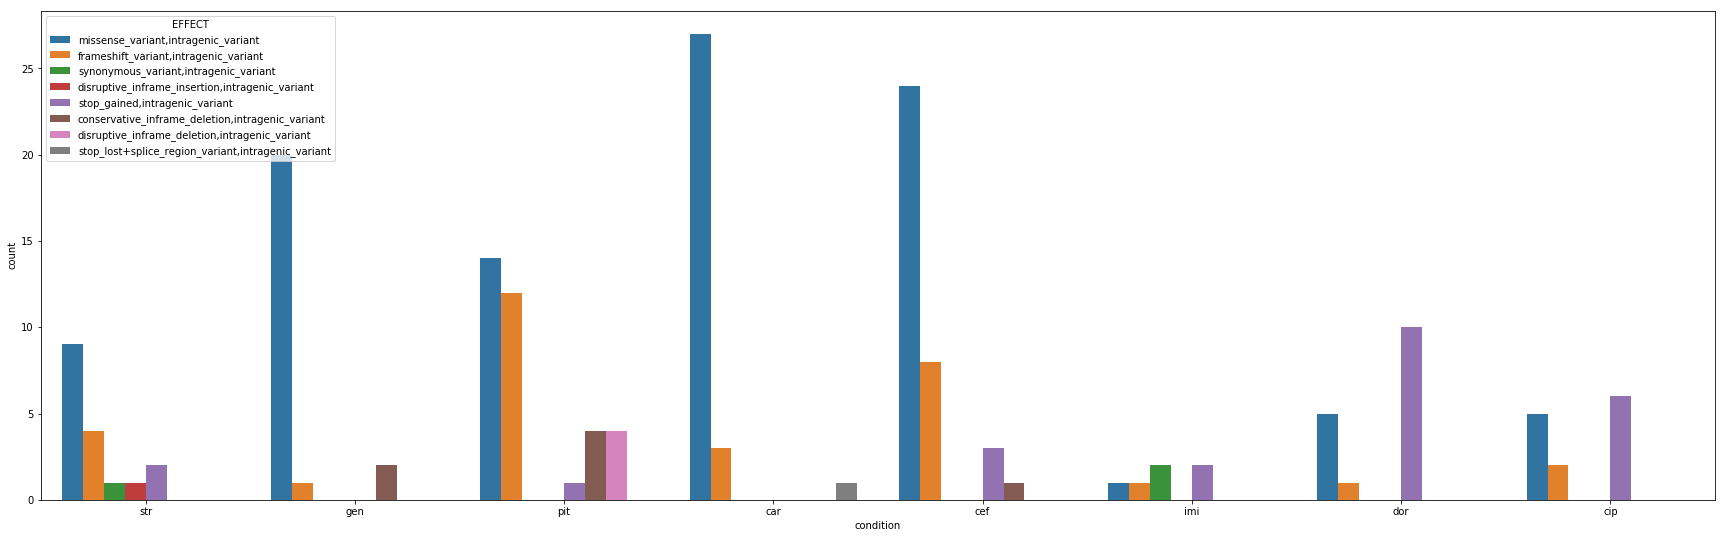

In [258]:
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(30, 9) )  # create figure & 1 axis
sns.countplot(x="condition", hue='EFFECT',data=pysqldf('SELECT * FROM var '));
display(fig)

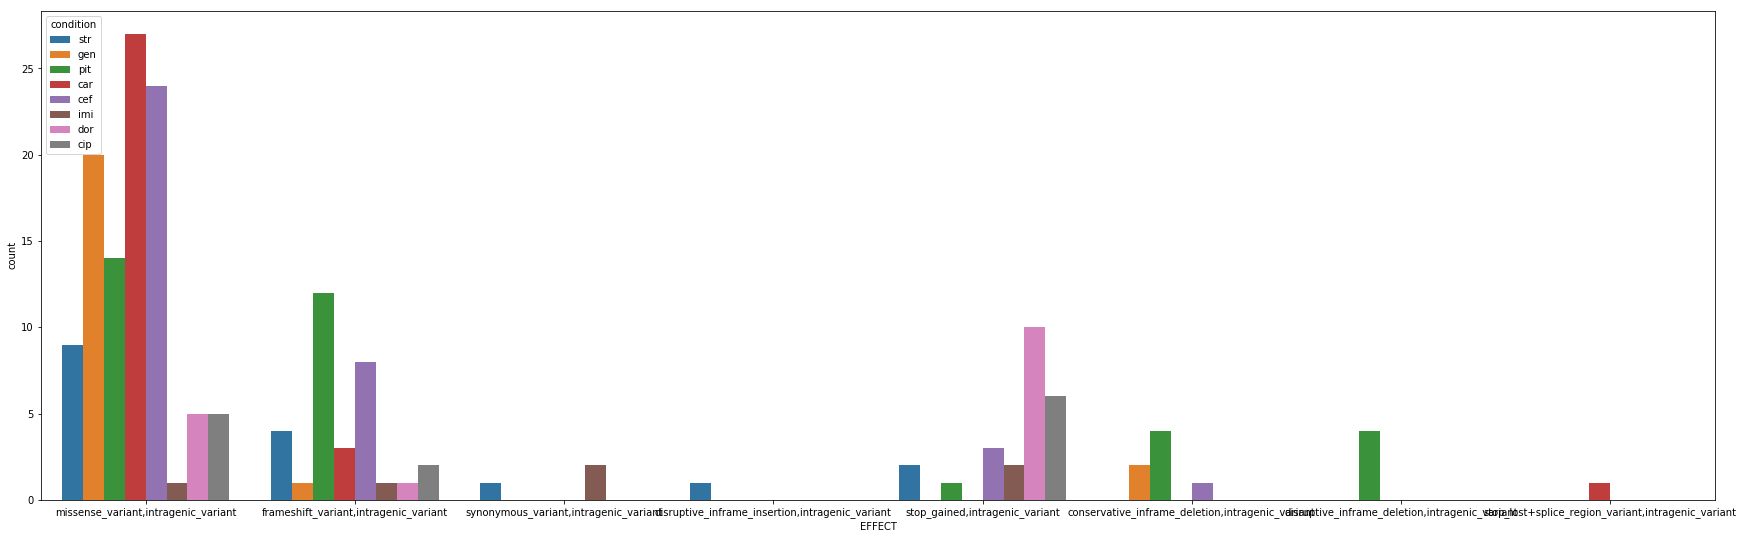

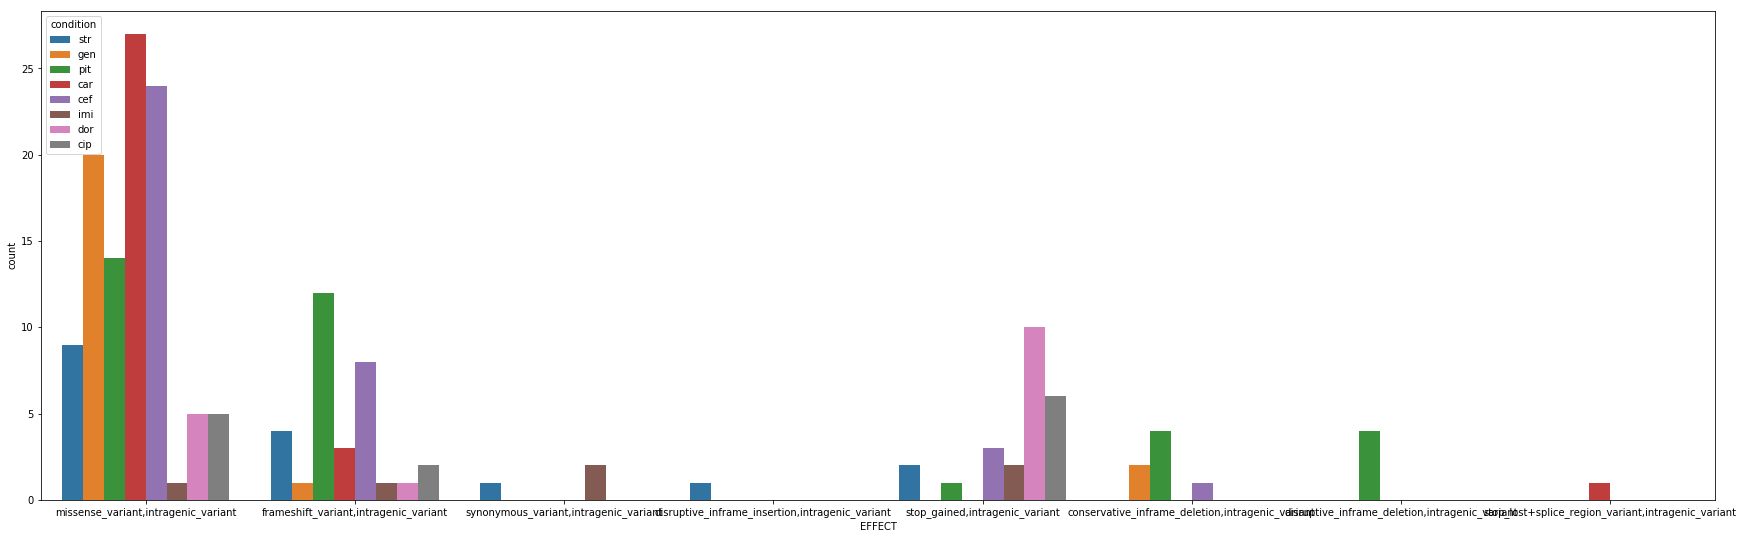

In [259]:
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(30, 9) )  # create figure & 1 axis
sns.countplot(x="EFFECT", hue='condition', data=pysqldf('SELECT * FROM var '));
display(fig)

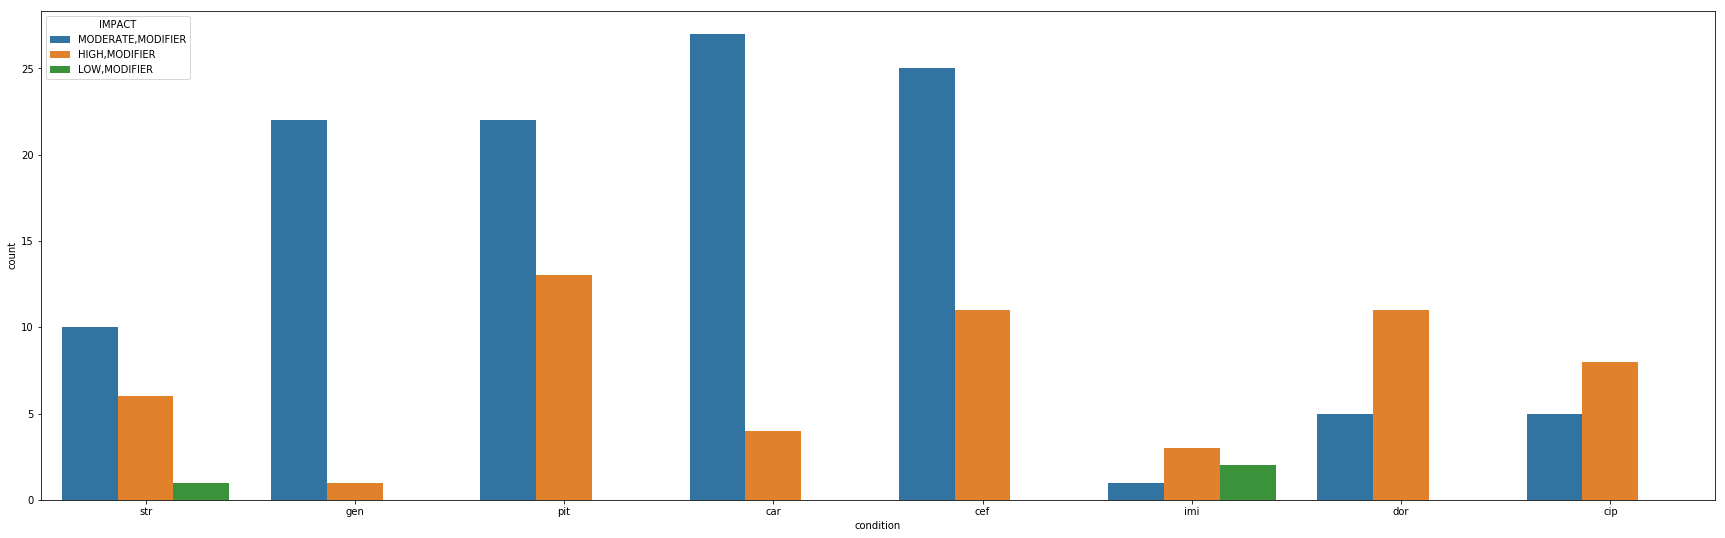

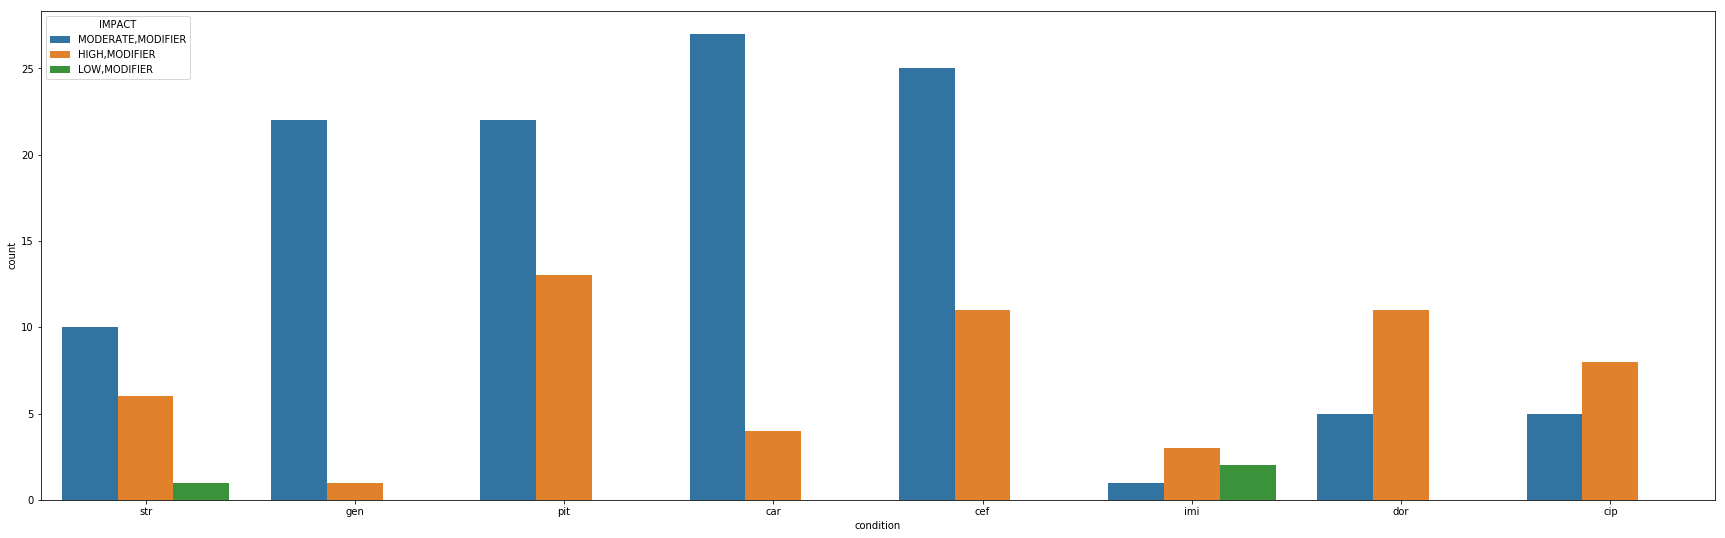

In [260]:
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(30, 9) )  # create figure & 1 axis
sns.countplot(x="condition", hue='IMPACT', data=pysqldf('SELECT * FROM var '));
display(fig)

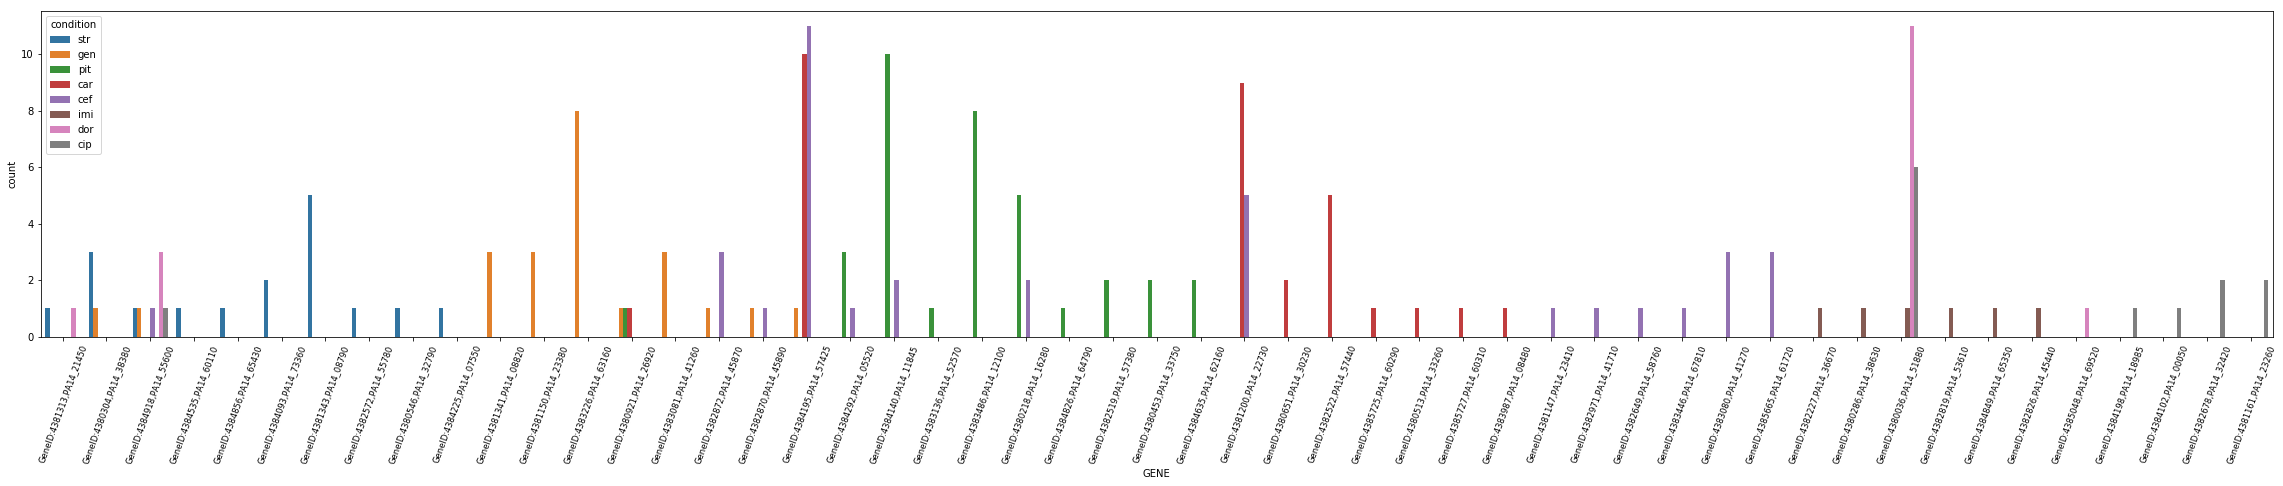

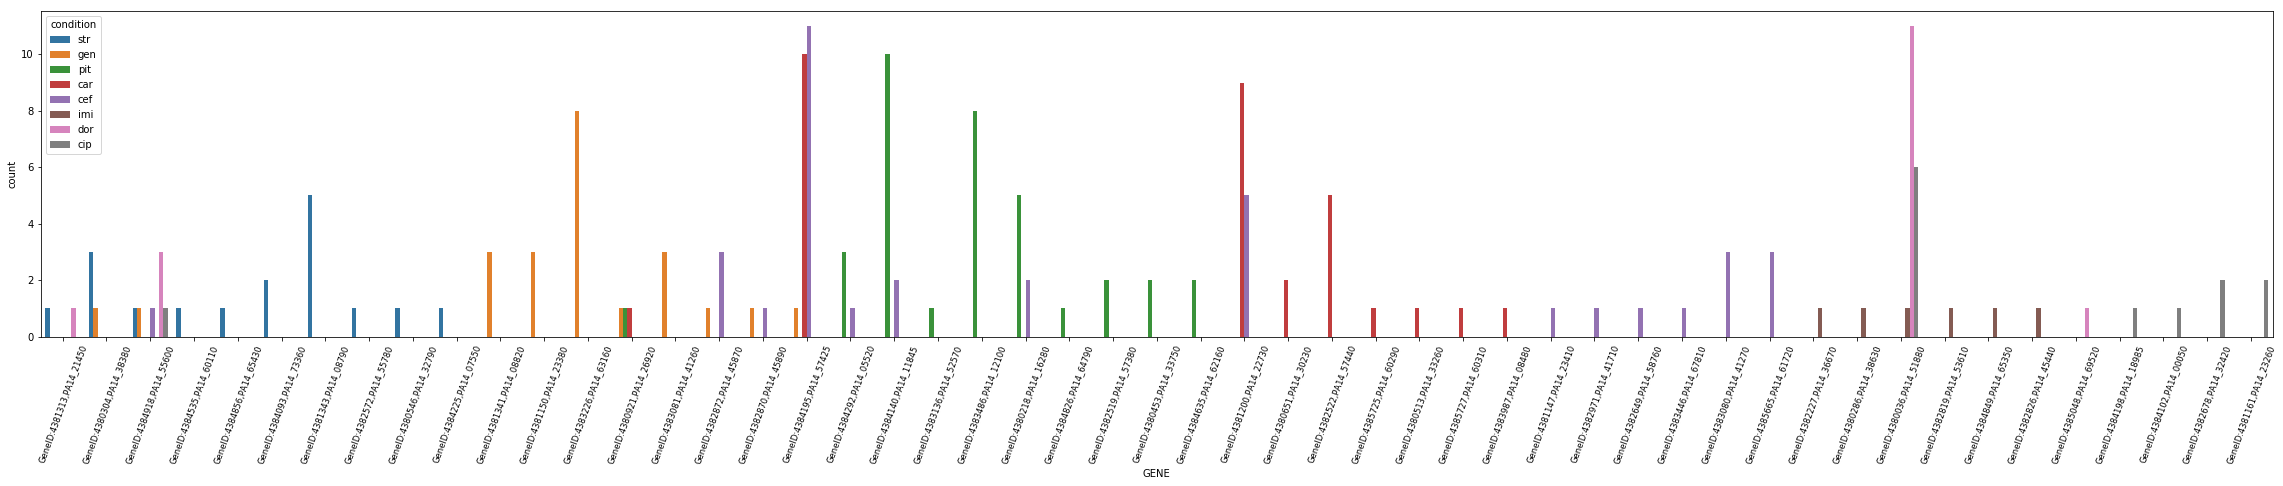

In [262]:
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(40, 6) )  # create figure & 1 axis
sns.countplot(x="GENE", hue='condition', data=pysqldf('SELECT * FROM var '));
plt.xticks(rotation=70, size='small')

display(fig)

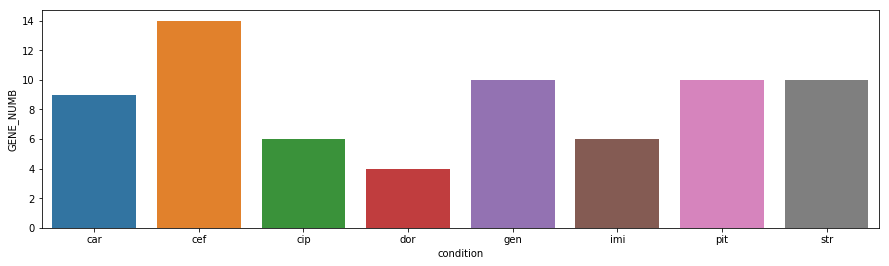

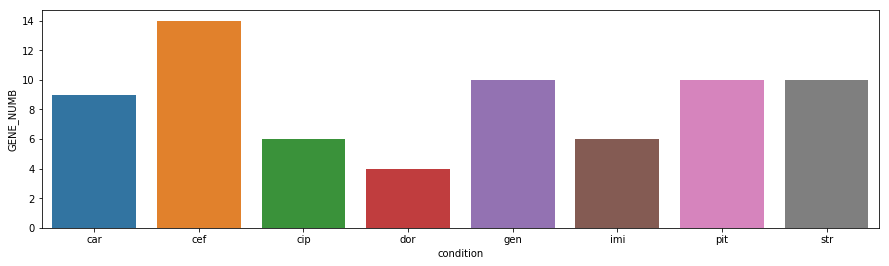

In [263]:
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(15, 4) )  # create figure & 1 axis
sns.barplot(x="condition", y="GENE_NUMB", data=pysqldf('SELECT condition, COUNT(DISTINCT UPPER(GENE)) AS GENE_NUMB  FROM var GROUP BY condition'));
display(fig)

ValueError: Could not interpret input 'QUAL'

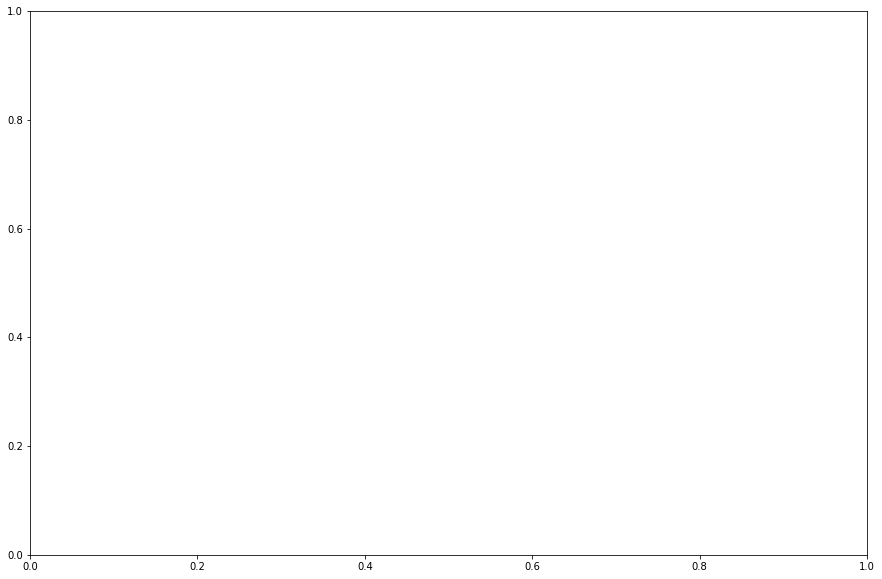

In [264]:

fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(15, 10) )  # create figure & 1 axis

sns.violinplot(x="condition", y="QUAL", data=pysqldf('SELECT * FROM var '));
display(fig)